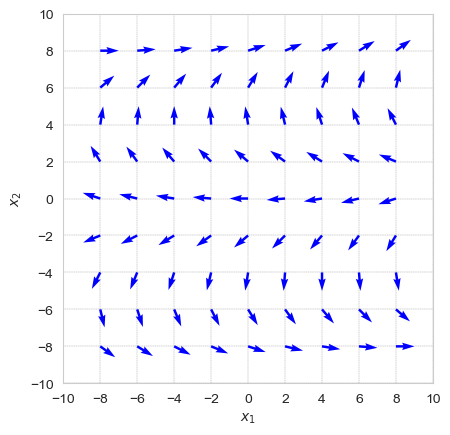

In [4]:
# Bk4_Ch13_01.py

import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1.25,  -0.75],
              [-0.75, 1.25]])
# 生成坐标位置
xx1, xx2 = np.meshgrid(np.linspace(-8, 8, 9), np.linspace(-8, 8, 9))
num_vecs = np.prod(xx1.shape);

thetas = np.linspace(0, 2*np.pi, num_vecs)

thetas = np.reshape(thetas, (-1, 9))
# np.flipud() 用于沿着数组的第一个轴（即行）翻转数组的顺序
thetas = np.flipud(thetas)

uu = np.cos(thetas);
vv = np.sin(thetas);

fig, ax = plt.subplots()

ax.quiver(xx1,xx2,uu,vv,
          angles='xy', scale_units='xy',scale=1, 
          edgecolor='none', facecolor= 'b')

plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.axis('scaled')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_xticks(np.linspace(-10,10,11));
ax.set_yticks(np.linspace(-10,10,11));
plt.show()


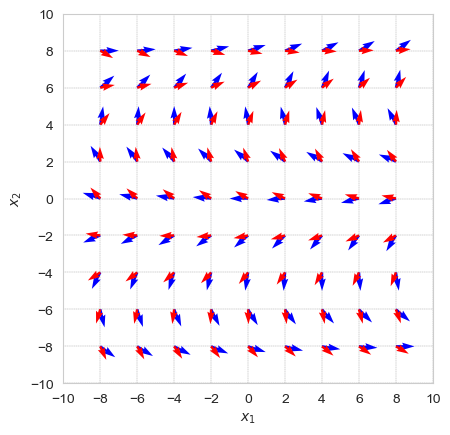

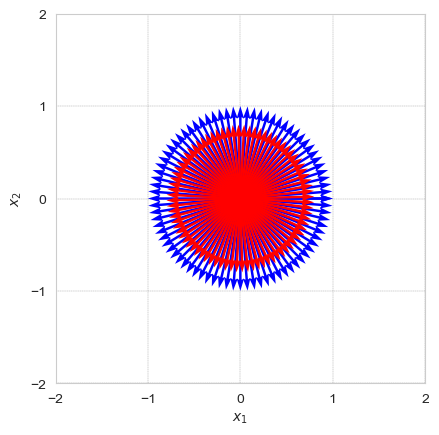

In [10]:
# Matrix multiplication
V = np.array([uu.flatten(),vv.flatten()]).T;
W = V@A;

uu_new = np.reshape(W[:,0],(-1, 9));
vv_new = np.reshape(W[:,1],(-1, 9));

fig, ax = plt.subplots()

ax.quiver(xx1,xx2,uu,vv,
          angles='xy', scale_units='xy',scale=1, 
          edgecolor='none', facecolor= 'b')

ax.quiver(xx1,xx2,uu_new,vv_new,
          angles='xy', scale_units='xy',scale=1, 
          edgecolor='none', facecolor= 'r')

plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.axis('scaled')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_xticks(np.linspace(-10,10,11));
ax.set_yticks(np.linspace(-10,10,11));
plt.show()


fig, ax = plt.subplots()
ax.quiver(xx1*0,xx2*0,uu,vv,
          angles='xy', scale_units='xy',scale=1, 
          edgecolor='none', facecolor= 'b')

ax.quiver(xx1*0,xx2*0,uu_new,vv_new,
          angles='xy', scale_units='xy',scale=1,
          edgecolor='none', facecolor= 'r')

plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.axis('scaled')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_xticks(np.linspace(-2,2,5));
ax.set_yticks(np.linspace(-2,2,5));
plt.show()


In [11]:
# Bk4_Ch13_02.py

import numpy as np
import matplotlib.pyplot as plt


def visualize(X_circle, X_vec, title_txt):
    fig, ax = plt.subplots()

    plt.plot(X_circle[0, :], X_circle[1, :], 'k',
             linestyle='--',
             linewidth=0.5)

    plt.quiver(0, 0, X_vec[0, 0], X_vec[1, 0],
               angles='xy', scale_units='xy', scale=1,
               color=[0, 0.4392, 0.7529])

    plt.quiver(0, 0, X_vec[0, 1], X_vec[1, 1],
               angles='xy', scale_units='xy', scale=1,
               color=[1, 0, 0])

    plt.axvline(x=0, color='k', zorder=0)
    plt.axhline(y=0, color='k', zorder=0)

    plt.ylabel('$x_2$')
    plt.xlabel('$x_1$')

    ax.set_aspect(1)
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-2.5, 2.5])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
    ax.set_xticks(np.linspace(-2, 2, 5));
    ax.set_yticks(np.linspace(-2, 2, 5));
    plt.title(title_txt)
    plt.show()


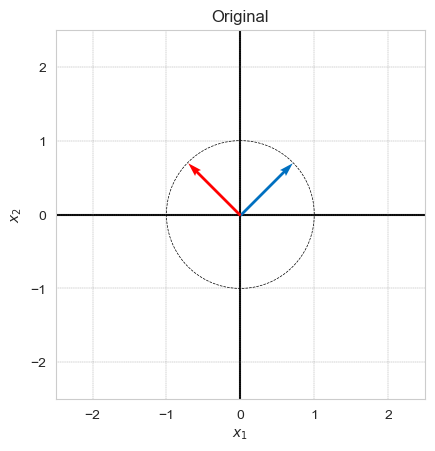

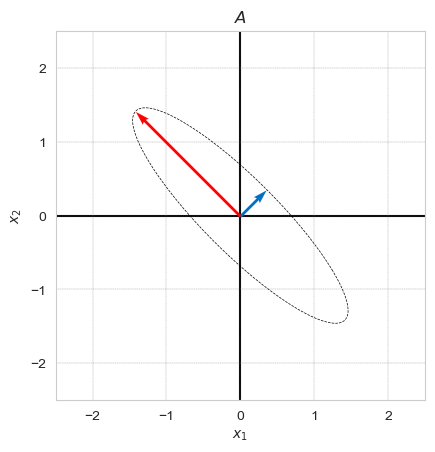

=== LAMBDA ===
[[0.5 0. ]
 [0.  2. ]]
=== V ===
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


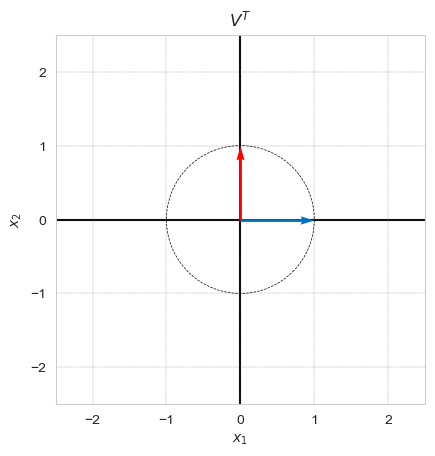

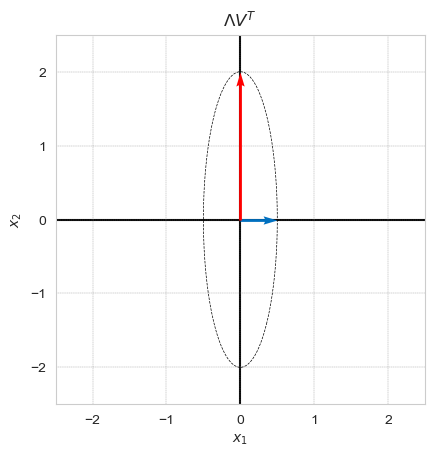

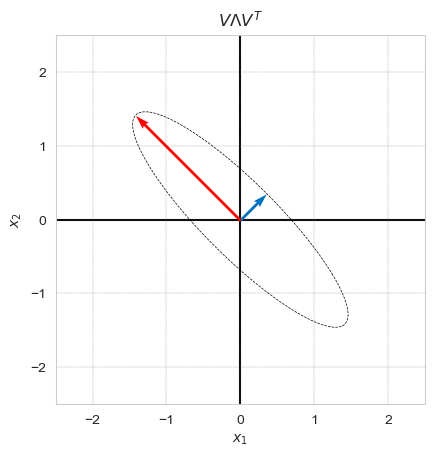

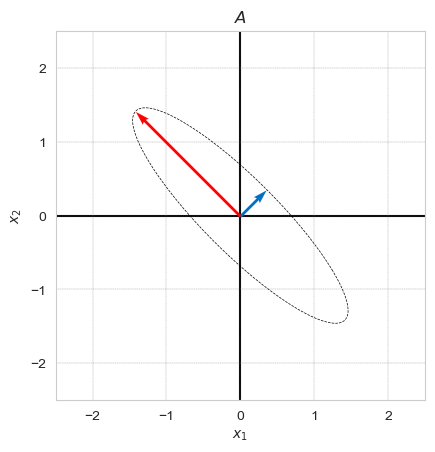

In [12]:
theta = np.linspace(0, 2 * np.pi, 100)

circle_x1 = np.cos(theta)
circle_x2 = np.sin(theta)

V_vec = np.array([[np.sqrt(2) / 2, -np.sqrt(2) / 2],
                  [np.sqrt(2) / 2, np.sqrt(2) / 2]])

X_circle = np.array([circle_x1, circle_x2])

# plot original circle and two vectors
visualize(X_circle, V_vec, 'Original')

A = np.array([[1.25, -0.75],
              [-0.75, 1.25]])

# plot the transformation of A

visualize(A @ X_circle, A @ V_vec, '$A$')

# A = V @ D @ V.T

# np.linalg.eig() 函数用于计算方阵的特征值和特征向量
lambdas, V = np.linalg.eig(A)
# np.flip() 函数用于创建对角矩阵
D = np.diag(np.flip(lambdas))
V = V.T  # reverse the order

print('=== LAMBDA ===')
print(D)
print('=== V ===')
print(V)

# plot the transformation of V.T

visualize(V.T @ X_circle, V.T @ V_vec, '$V^T$')

# plot the transformation of D @ V.T

visualize(D @ V.T @ X_circle, D @ V.T @ V_vec, '$\u039BV^T$')

# plot the transformation of V @ D @ V.T

visualize(V @ D @ V.T @ X_circle, V @ D @ V.T @ V_vec, '$V\u039BV^T$')

# plot the transformation of A

visualize(A @ X_circle, A @ V_vec, '$A$')


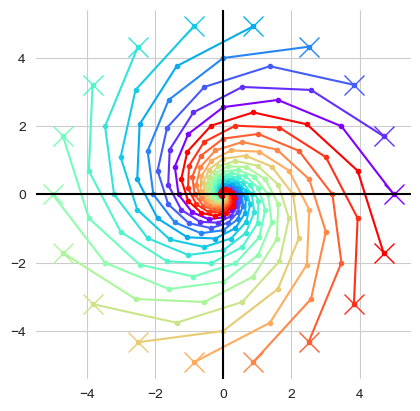

In [6]:
# Bk4_Ch13_03.py

import numpy as np
import matplotlib.pyplot as plt

theta = np.deg2rad(30)

r = 0.8 # 1.2, scaling factor

R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

S = np.array([[r, 0],
              [0, r]])

A = R@S

# A = np.array([[1, -1],
#               [1, 1]])

# 特征值和特征向量
Lamb, V = np.linalg.eig(A)a 

theta_array = np.arange(0,np.pi*2,np.pi*2/18)

colors = plt.cm.rainbow(np.linspace(0,1,len(theta_array)))

fig, ax = plt.subplots()

for j, theat_i in enumerate(theta_array):
    
    # initial point
    x = np.array([[5*np.cos(theat_i)],
                  [5*np.sin(theat_i)]])

    plt.plot(x[0],x[1], 
             marker = 'x',color = colors[j],
             markersize = 15)
    # plot the initial point
    
    x_array = x

    for i in np.arange(20):

        x = A@x
        x_array = np.column_stack((x_array,x))


    colors_j = colors[j,:]
    plt.plot(x_array[0,:],x_array[1,:], marker = '.',color = colors_j)


plt.axis('scaled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axvline(x=0,color = 'k')
ax.axhline(y=0,color = 'k')